In [66]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import seaborn as sns
# customisations - ensure tables show all columns
pd.set_option("max_columns", 100)
pd.options.plotting.backend = "plotly"

In [ ]:
try standard scaler and min max scaler, countvect and tfidf
find best default model then tune that one

In [ ]:
cvec = CountVectorizer(lowercase=False, max_df = 0.8, ngram_range=(1, 1)) 
#capitalisation etc could be important, can change ngrams later

In [ ]:
LogReg: 0.638303 (0.001846)
Random Forest: 0.663773 (0.002605)
KNN: 0.590291 (0.001253)
SVM: 0.641937 (0.002548)

best default models are SVM and random forest when checking the accuracy scores

be careful to tune random forest and SV< otherwise takes ages

with alpha 0.1
MultiNB: 0.612313 (0.005205) 
BernoulliNB: 0.616933 (0.005798)

In [139]:
import joblib
results = joblib.load('data/default_model_resultsammended')

In [140]:
results

[['RidgeClassifier',
  'Perceptron',
  'PassiveAggressiveClassifier',
  'KNeighborsClassifier',
  'RandomForestClassifier',
  'LinearSVC_L2',
  'SGDClassifier_L2',
  'LinearSVC_L1',
  'SGDClassifier_L1',
  'SGDClassifier_ENet',
  'NearestCentroid',
  'MultinomialNB',
  'BernoulliNB',
  'LinearSVC_L1FeatureSel',
  'Logistic'],
 [0.5335942596216569,
  0.594259621656882,
  0.5844748858447488,
  0.5903457273320287,
  0.644487932159165,
  0.6405740378343118,
  0.6275277234181343,
  0.6255707762557078,
  0.588388780169602,
  0.6223091976516634,
  0.5792563600782779,
  0.5857795172863666,
  0.6092628832354859,
  0.639921722113503,
  0.638303],
 [2.393079996109009,
  0.616854190826416,
  1.5292479991912842,
  0.06583285331726074,
  480.3133590221405,
  86.4237768650055,
  1.1724202632904053,
  28.10608720779419,
  3.866161823272705,
  1.8230841159820557,
  0.12123489379882812,
  0.22648382186889648,
  0.21808719635009766,
  46.15422511100769,
  0.2111111],
 [0.00049591064453125,
  0.0009269714

In [76]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='r')
plt.barh(indices + .3, training_time, .2, label="training time", color='g')
plt.barh(indices + .6, test_time, .2, label="test time", color='b')
plt.yticks((), fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c, fontsize=14)

plt.show()

TypeError: cannot perform reduce with flexible type

['KNeighborsClassifier',
 0.5903457273320287,
 0.06583285331726074,
 4.162939071655273]

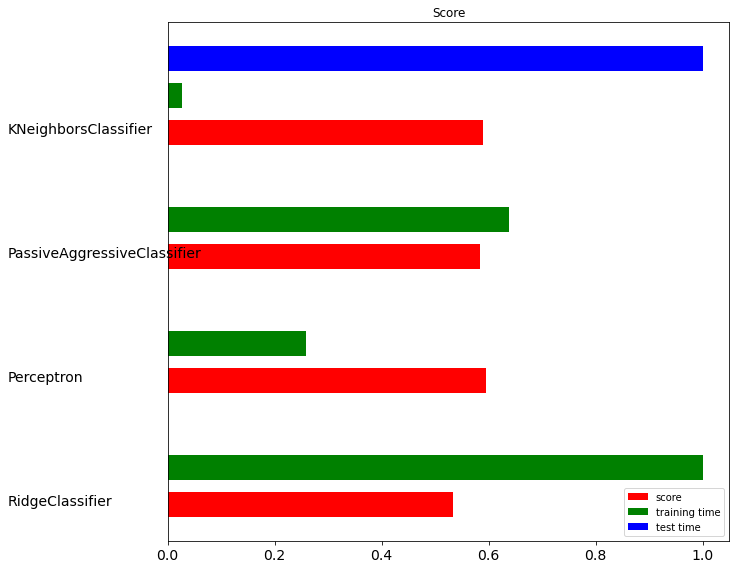

In [77]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='r')
plt.barh(indices + .3, training_time, .2, label="training time", color='g')
plt.barh(indices + .6, test_time, .2, label="test time", color='b')
plt.yticks((), fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c, fontsize=14)

In [57]:
df = pd.DataFrame(data = results, index = [0, 'score', 'training_time', 'test_time'])

In [141]:
df = pd.DataFrame(data = results).T

In [81]:
df.head()

,0,1,2,3
0,RidgeClassifier,0.533594,2.39308,0.000495911
1,Perceptron,0.59426,0.616854,0.000926971
2,PassiveAggressiveClassifier,0.584475,1.52925,0.000589132
3,KNeighborsClassifier,0.590346,0.0658329,4.16294
4,RandomForestClassifier,0.644488,480.313,0.729551


In [142]:
df.columns = ['Model', 'Score', 'Training_time', 'Test_time']

In [83]:
df.head()

,Model,Score,Training_time,Test_time
0,RidgeClassifier,0.533594,2.39308,0.000495911
1,Perceptron,0.59426,0.616854,0.000926971
2,PassiveAggressiveClassifier,0.584475,1.52925,0.000589132
3,KNeighborsClassifier,0.590346,0.0658329,4.16294
4,RandomForestClassifier,0.644488,480.313,0.729551


In [143]:
df.sort_values(by='Score', ascending=True, inplace=True)
df.Score = df.Score.astype(float).round(2)

In [144]:
df.head()

,Model,Score,Training_time,Test_time
0,RidgeClassifier,0.53,2.39308,0.000495911
10,NearestCentroid,0.58,0.121235,0.00812984
2,PassiveAggressiveClassifier,0.58,1.52925,0.000589132
11,MultinomialNB,0.59,0.226484,0.000984669
8,SGDClassifier_L1,0.59,3.86616,0.000582218


In [89]:
df.plot.barh(y = 'Model', x = ['Score', 'Training_time', 'Test_time'])

In [71]:
clf_names, score, training_time, test_time = results

In [72]:
clf_names

['RidgeClassifier',
 'Perceptron',
 'PassiveAggressiveClassifier',
 'KNeighborsClassifier',
 'RandomForestClassifier',
 'LinearSVC_L2',
 'SGDClassifier_L2',
 'LinearSVC_L1',
 'SGDClassifier_L1',
 'SGDClassifier_ENet',
 'NearestCentroid',
 'MultinomialNB',
 'BernoulliNB',
 'LinearSVC_L1FeatureSel',
 'Logistic']

In [145]:
training = np.array(df.Training_time)/np.max(df.Training_time)
testing = np.array(df.Test_time)/np.max(df.Test_time)

In [148]:
import plotly.express as px

fig = px.bar(df, y=models,
                x=df.Score,
                #name='Score',
                     orientation='h',
               color_discrete_sequence=['forestgreen']*len(df), 
             text='Score')

fig.add_trace(go.Bar(y=models,
                x=training,
                name='Training Time',
                     orientation='h',
                marker_color='tomato'
                     
                ))

fig.add_trace(go.Bar(y=models,
                x=testing,
                name='Testing Time',
                     orientation='h',
                marker_color='cornflowerblue'
                     
                ))
fig.update_layout(barmode='group')

#fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_traces(textfont_color='black', textposition='outside')
fig.update_layout(height = 600,
    title='CVec Model Scores', uniformtext_minsize=10, uniformtext_mode='show', bargap=0.1)


fig.show()